In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

In [156]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [157]:
#Droping Unnamed column as it is same as of index.

df.drop('Unnamed: 0',axis=1,inplace=True)

In [158]:
df.shape

(18249, 13)

In [159]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [160]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [161]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
102,2015-01-11,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.00,conventional,2015,Atlanta
13453,2016-10-02,1.99,100529.39,5768.29,20282.07,1326.00,73153.03,72212.14,940.89,0.00,organic,2016,Northeast
4663,2016-04-24,0.95,2088524.46,887508.56,650864.38,11773.39,538378.13,474085.79,56591.26,7701.08,conventional,2016,Plains
8657,2018-01-07,1.35,169476.04,2865.76,75494.46,45133.04,45982.78,29085.45,3455.76,13441.57,conventional,2018,GrandRapids
15822,2017-08-06,2.09,1552.26,83.93,489.38,1.18,977.77,977.77,0.00,0.00,organic,2017,Jacksonville


In [162]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [163]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [165]:
#Converting dataype of Date column to datetime and adding new column month from the same.

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


# Data Visualization

<Axes: >

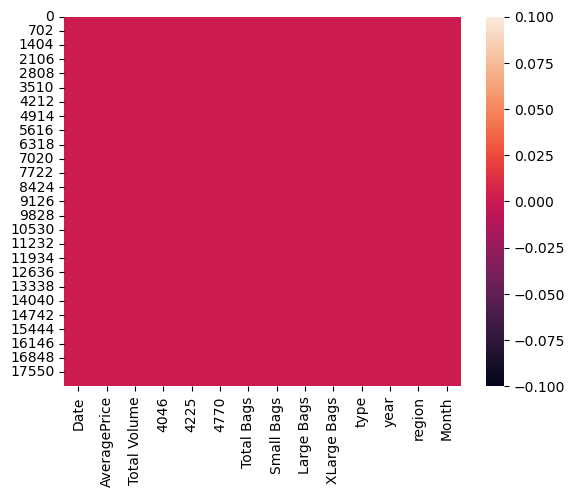

In [167]:
#To check null values

sns.heatmap(df.isnull())

In [168]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
dtype: int64

The dataset has no null values.

In [169]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

No of counts to know how much type of avocado is sell in last 4 years.

In [170]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


The mean and 50% value of most of the columns are same and the STD and mean are very close to each other.

By checking the difference between the 75% and max value there are outliers in some of the columns.

In [171]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<Axes: xlabel='year', ylabel='AveragePrice'>

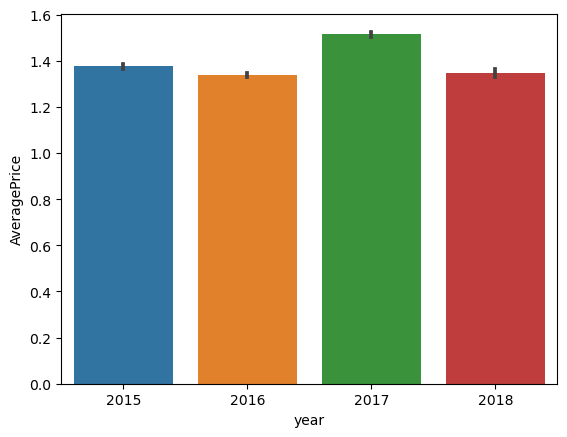

In [172]:
#checking ratio of year and price that which year had max average price

sns.barplot(x='year',y='AveragePrice',data=df)

So above graph shows that 2017 year is the year with highest average price.

<Axes: xlabel='Month', ylabel='AveragePrice'>

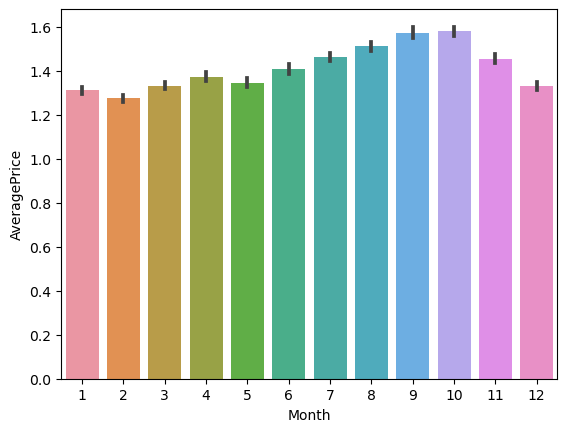

In [173]:
#checking ratio of month and price that which month had max average price

sns.barplot(x='Month',y='AveragePrice',data=df)

September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

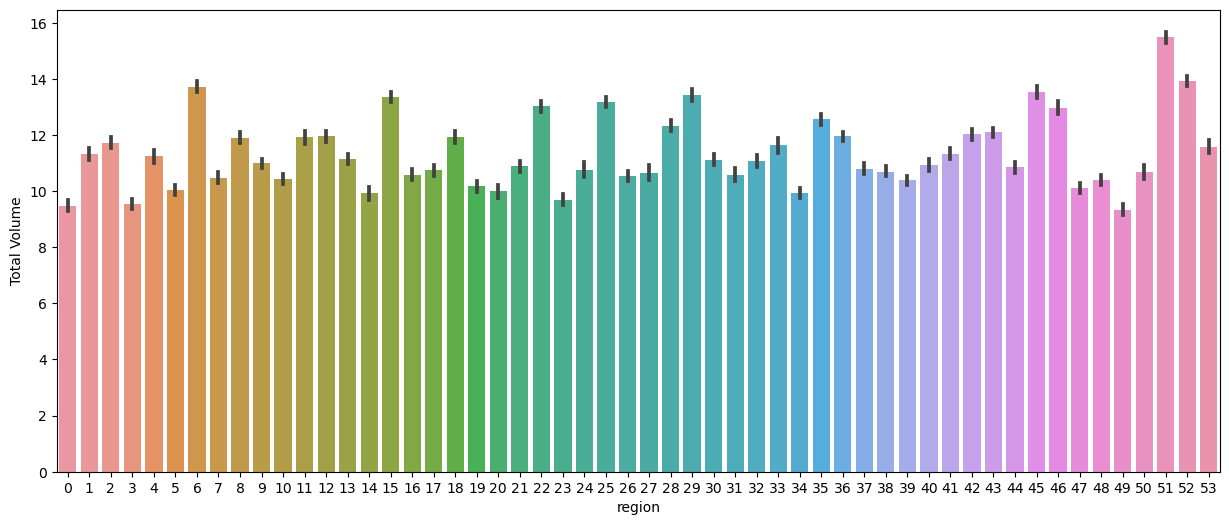

In [194]:
#checking ratio of region and total volume that which region had max total volume

plt.figure(figsize=(15,6))
sns.barplot(x='region',y='Total Volume',data=df)
plt.show()

TotalUs region that is encoded with 51 has large no of total volume as per other regions but comparatively all the regions has good amount of avocado volume.

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>],
       [<Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>],
       [<Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

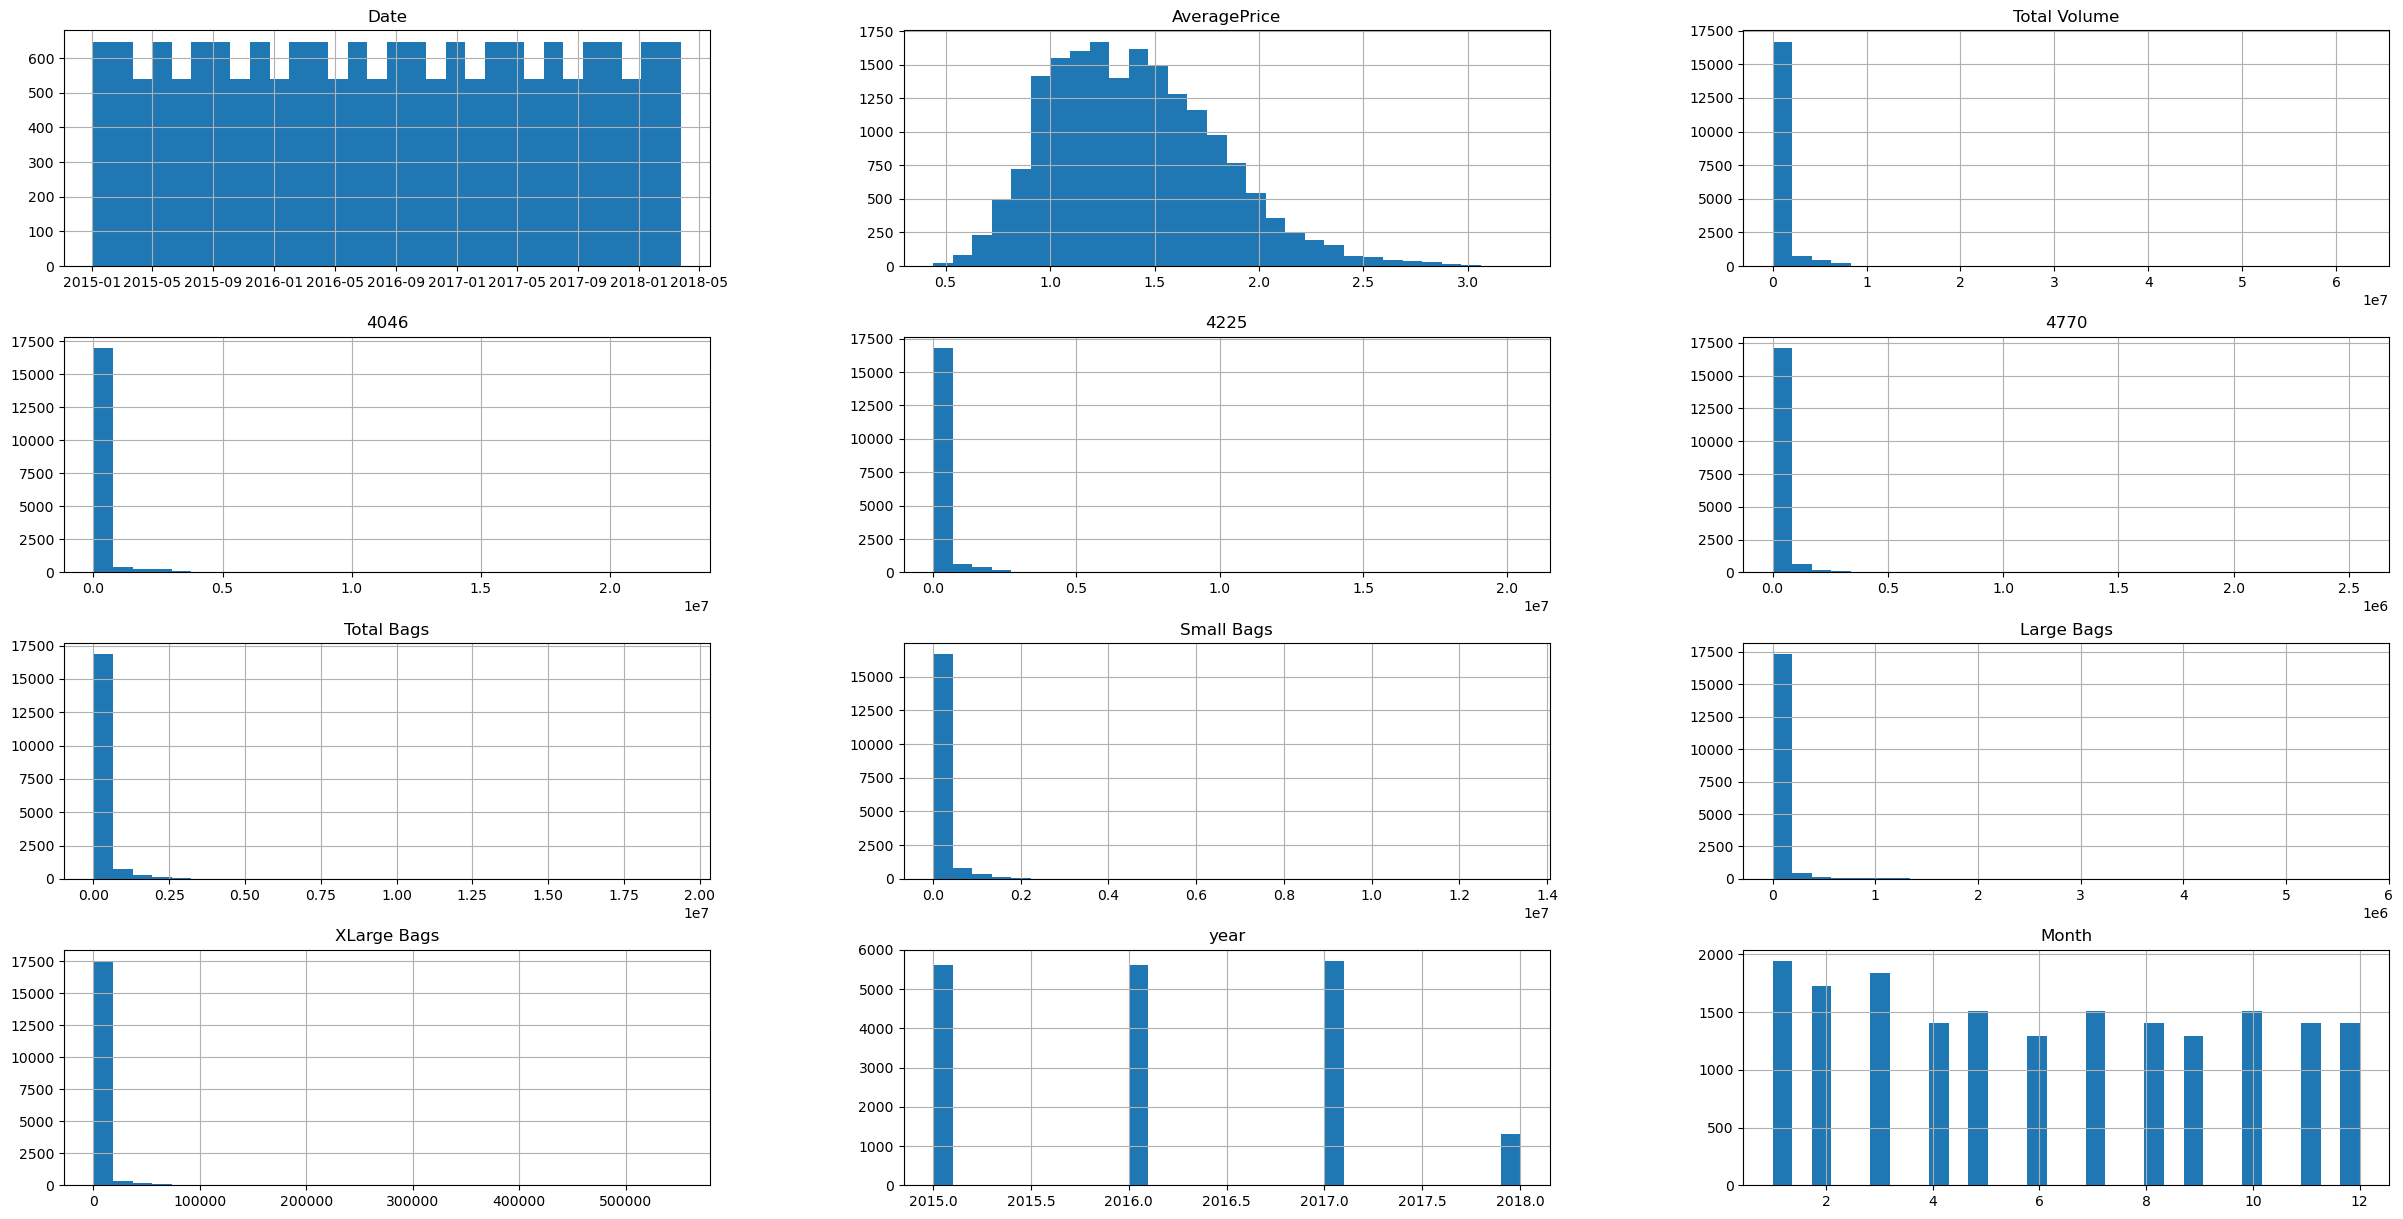

In [175]:
#Plotting histogram for unvariate analysis and checking the normal distribution.

df.hist(bins=30,figsize=(30,15))

Average price column is normally distributing over the histogram. Other columns are mostly left skewed. So will remove the skeweness using log1p method of numpy. 

In [176]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

In [177]:
new_cols=('AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')#

In [178]:
#making the skewness less than or equal to 0.55 for better prediction and plotting Normal Distribution.

for i in new_cols:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

The skew value for normally distributes is very close to zero, so we are using “log1p” method from numpy library to make the skew value near to zero

In [179]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
Month           0.106617
dtype: float64

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>],
       [<Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>],
       [<Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

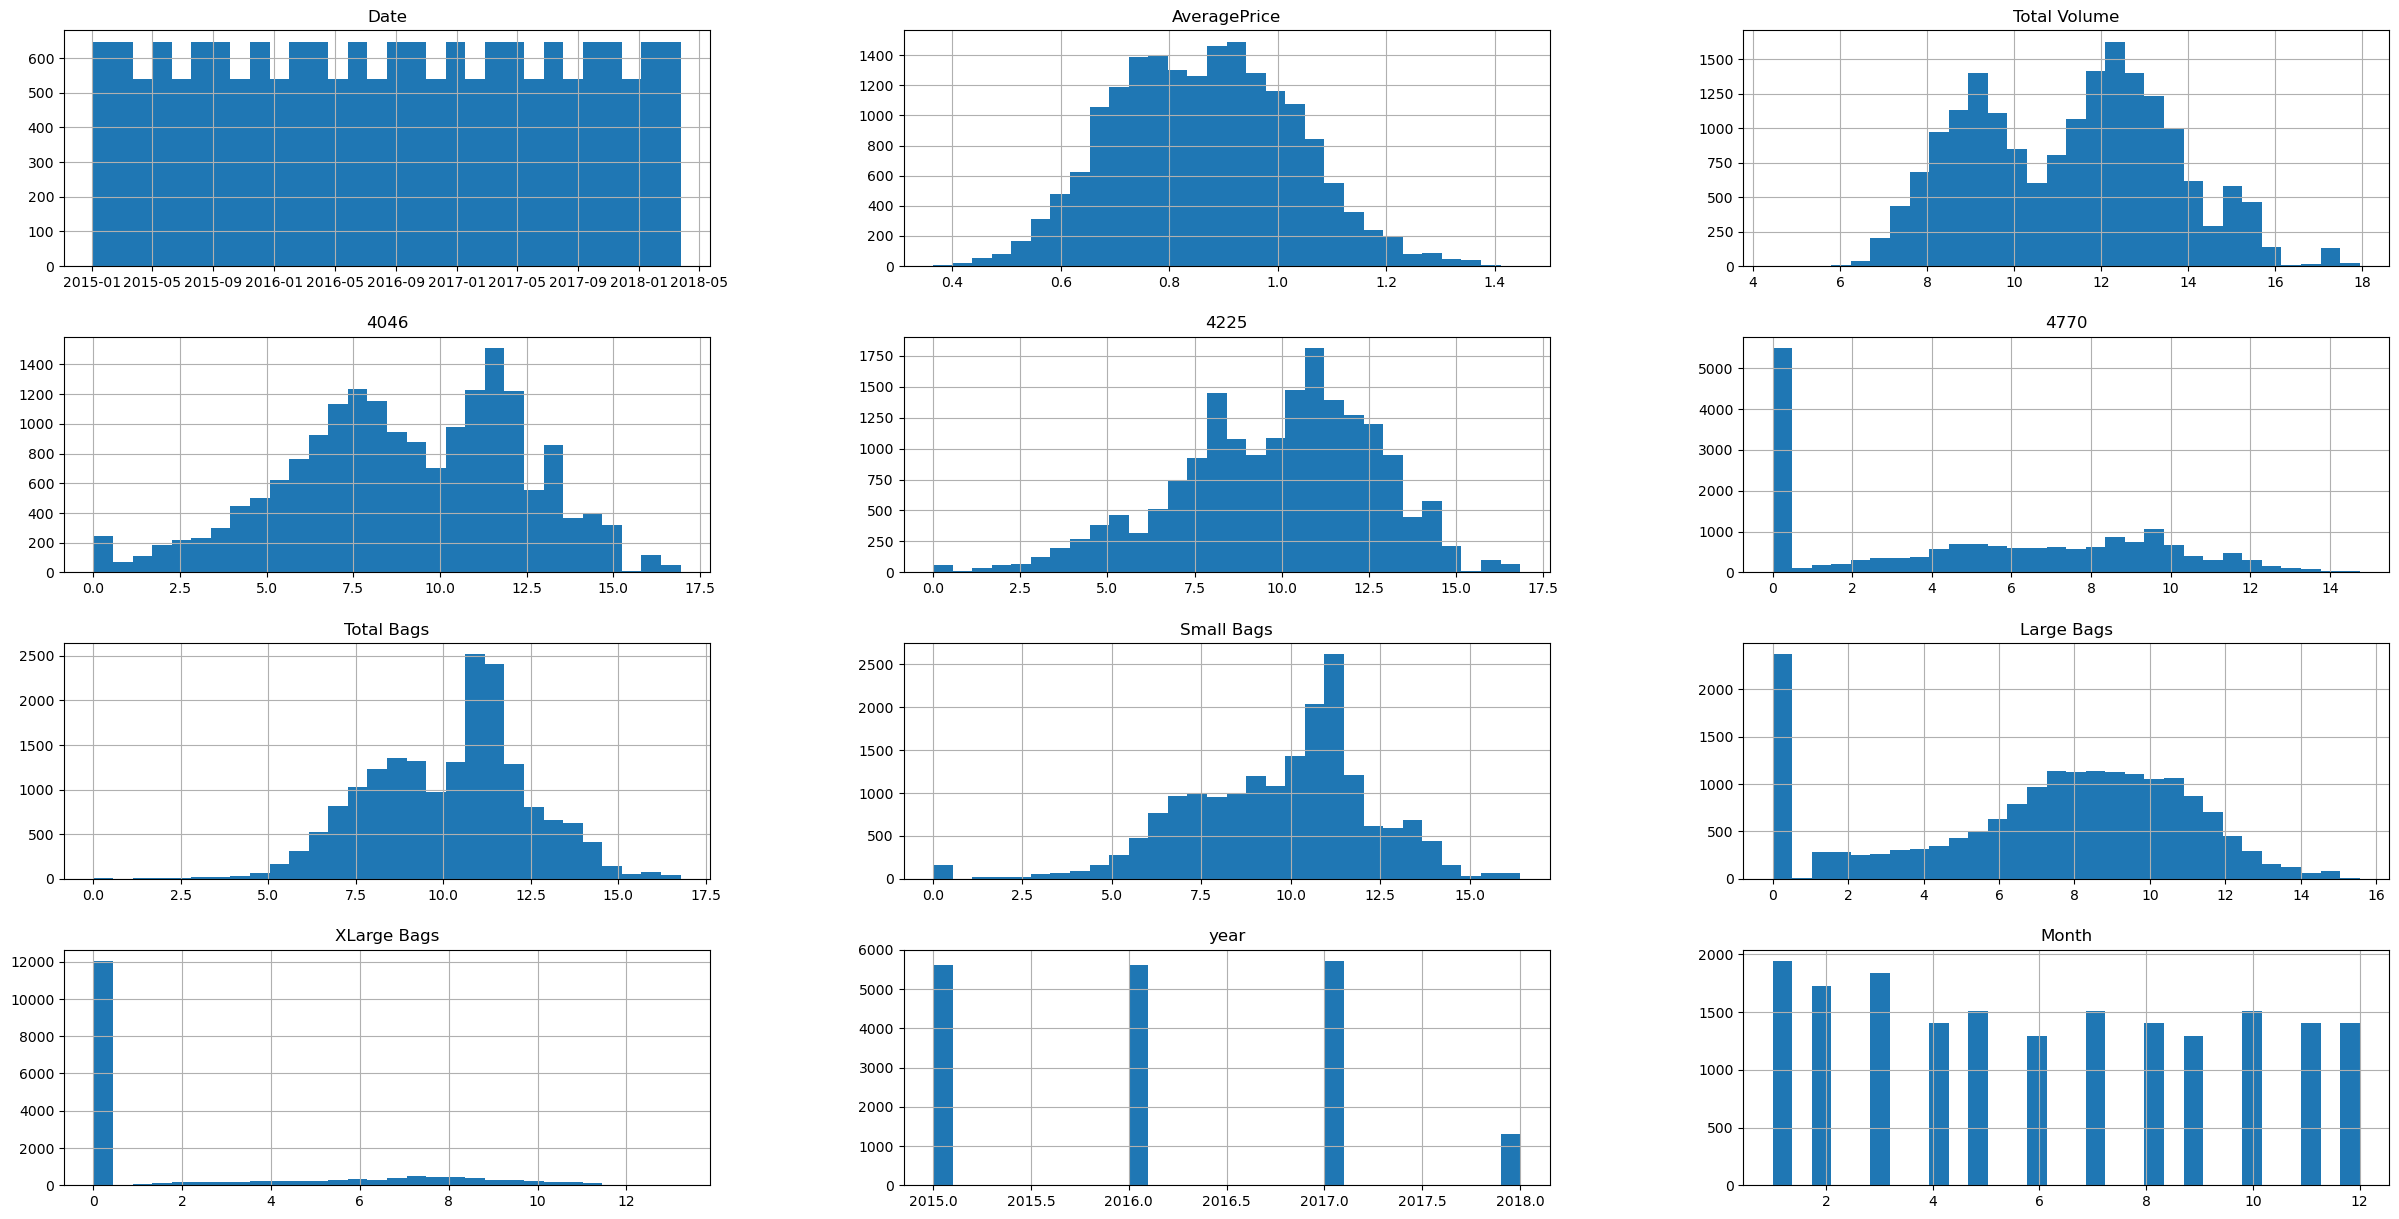

In [180]:
df.hist(bins=30,figsize=(30,15))

Now, all the columns are normally distributed.

# Data Encoding 

In [181]:
df.replace({'type':{'conventional':0,'organic':1}},inplace=True)

In [182]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,Albany,12
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,Albany,12
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,Albany,12
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,Albany,12
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,Albany,11


In [183]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [184]:
df['region'].nunique()

54

In [185]:
df.replace({'region':{'Albany':0,'Atlanta':1,'BaltimoreWashington':2,'Boise':3,'Boston':4,'BuffaloRochester':5,'California':6,'Charlotte':7,'Chicago':8,'CincinnatiDayton':9,'Columbus':10,'DallasFtWorth':11,'Denver':12,'Detroit':13,'GrandRapids':14,'GreatLakes':15,'HarrisburgScranton':16,'HartfordSpringfield':17,'Houston':18,'Indianapolis':19,'Jacksonville':20,'LasVegas':21,'LosAngeles':22,'Louisville':23,'MiamiFtLauderdale':24,'Midsouth':25,'Nashville':26,'NewOrleansMobile':27,'NewYork':28,'Northeast':29,'NorthernNewEngland':30,'Orlando':31,'Philadelphia':32,'PhoenixTucson':33,'Pittsburgh':34,'Plains':35,'Portland':36,'RaleighGreensboro':37,'RichmondNorfolk':38,'Roanoke':39,'Sacramento':40,'SanDiego':41,'SanFrancisco':42,'Seattle':43,'SouthCarolina':44,'SouthCentral':45,'Southeast':46,'Spokane':47,'StLouis':48,'Syracuse':49,'Tampa':50,'TotalUS':51,'West':52,'WestTexNewMexico':53}},inplace=True)

In [186]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
18244,2018-02-04,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,2018-01-28,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,2018-01-21,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,2018-01-14,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1
18248,2018-01-07,0.963174,9.769418,7.971006,7.765200,5.418453,9.393924,9.391757,3.296207,0.0,1,2018,53,1


Encoded type and region columns that were in categorical format to numerical format for further analaysis.

AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
4046             Axes(0.44569,0.712609;0.133621x0.167391)
4225            Axes(0.606034,0.712609;0.133621x0.167391)
4770            Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
type            Axes(0.766379,0.511739;0.133621x0.167391)
year                Axes(0.125,0.31087;0.133621x0.167391)
region           Axes(0.285345,0.31087;0.133621x0.167391)
Month             Axes(0.44569,0.31087;0.133621x0.167391)
dtype: object

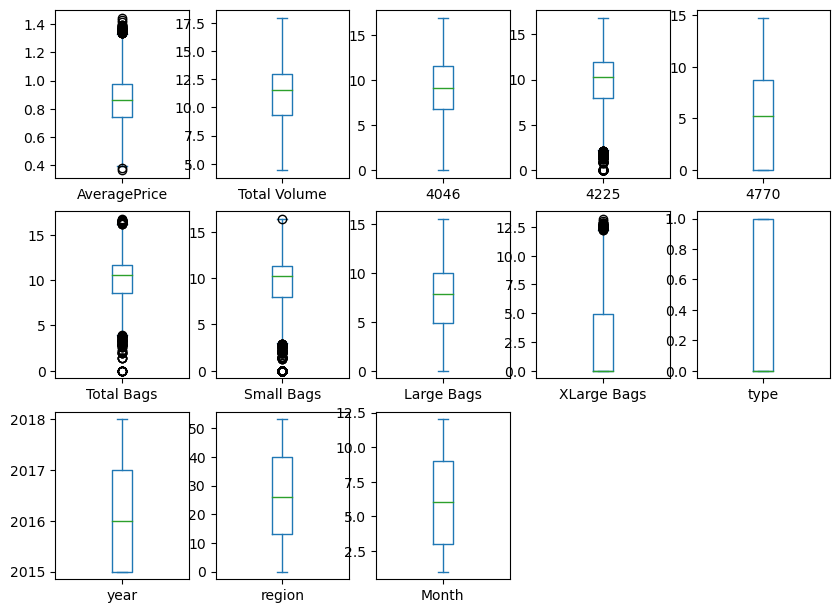

In [187]:
#Plotting boxplot for each columns to check outliers

df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

Outliers are present in Average Price, 4225 PLU, Total Bags, Small Bags, XLarge Bags columns.

In [188]:
#Droping date column 

df.drop('Date',axis=1,inplace=True)

In [189]:
df.shape

(18249, 13)

Removing outliers using zscore

In [190]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.111918,0.107282,0.609752,0.374936,0.279143,0.494074,0.247796,0.669747,0.645526,0.999836,1.221282,1.700252,1.647632
1,0.060020,0.175949,0.737707,0.305200,0.233838,0.454761,0.213093,0.658279,0.645526,0.999836,1.221282,1.700252,1.647632
2,1.255560,0.158690,0.688840,0.618892,0.042078,0.523041,0.273995,0.643743,0.645526,0.999836,1.221282,1.700252,1.647632
3,0.801087,0.017121,0.583598,0.472808,0.181974,0.672335,0.409182,0.576571,0.645526,0.999836,1.221282,1.700252,1.647632
4,0.243636,0.207558,0.638425,0.298852,0.171717,0.644845,0.388616,0.475393,0.645526,0.999836,1.221282,1.700252,1.364669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.623491,0.685006,0.407310,0.878279,1.217613,0.299689,0.085548,0.272479,0.645526,1.000164,1.970504,1.700811,1.181997
18245,0.805435,0.775077,0.568306,0.594835,1.217613,0.466102,0.232904,0.346517,0.645526,1.000164,1.970504,1.700811,1.464959
18246,1.153743,0.778901,0.568251,0.712597,0.370548,0.459975,0.215422,0.872380,0.645526,1.000164,1.970504,1.700811,1.464959
18247,1.279375,0.707798,0.494407,0.644192,0.370240,0.391424,0.155249,0.829787,0.645526,1.000164,1.970504,1.700811,1.464959


In [191]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(18249, 13)


In [192]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1


Removed all outliers that has zscore value >3

In [193]:
df=df_new
print(df.shape)

(17928, 13)


After removing the outliers, there are 17928 rows and 13 columns presents in the data set.

# Correlation Matrix

<Axes: >

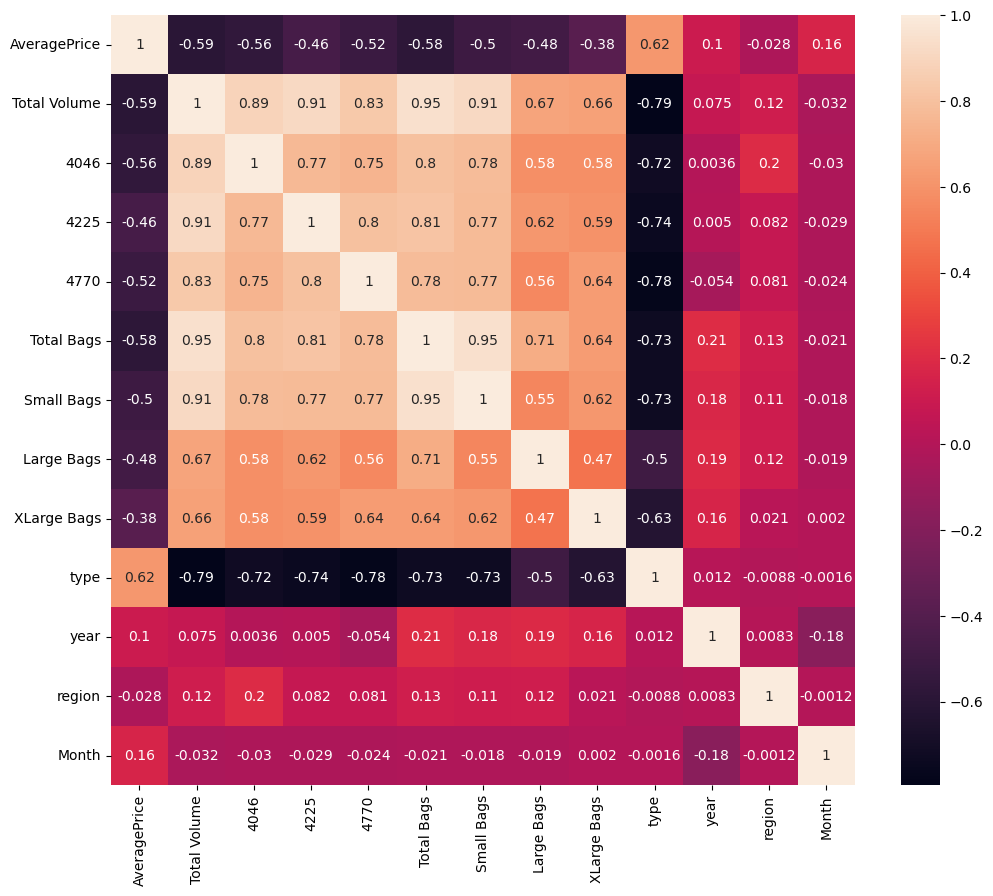

In [195]:
#To chcek correlation of all the columns with each other

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

# Prediction with Average Price

# Implementing Machine Learning thru Linear Regression

In [196]:
x=df.iloc[:,1:12]
y=df.iloc[:,0]

Seperated target and its features so that x only has input variables and y only has output variable

In [197]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [198]:
y

0        0.845868
1        0.854415
2        0.657520
3        0.732368
4        0.824175
           ...   
18244    0.966984
18245    0.996949
18246    1.054312
18247    1.075002
18248    0.963174
Name: AveragePrice, Length: 17928, dtype: float64

Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12549, 11)
(5379, 11)
(12549,)
(5379,)


In [200]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [201]:
LR.coef_

array([-0.06019664,  0.00037975,  0.03749821,  0.00118815, -0.04511715,
        0.04252799, -0.00364632,  0.00332686,  0.15230797,  0.03063322,
        0.00039237])

In [202]:
LR.intercept_

-60.61846188891361

In [203]:
LR.score(x_train,y_train)

0.5381086236910301

The above score shows that the model how much model performed in its traing phase.

In [204]:
LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [0.76787388 1.05201413 0.81700054 ... 0.77179791 1.01711875 1.06395349]
Actual value 2270     0.703098
17000    1.291984
4935     0.756122
12917    0.867100
16585    0.896088
           ...   
15033    1.272566
16346    0.932164
839      0.737164
15970    1.036737
14791    1.043804
Name: AveragePrice, Length: 5379, dtype: float64


The above data shows the predicted value and the actual value.

In [205]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))

print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 0.01223433744748366
Mean Absolute Error: 0.08754700256750515
Root Mean Squared Error: 0.11060893927474243
R2 Score: 0.5446052753737245


The model has an Root Mean Squared Error score of ~0.11. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

# Using Random Forest Regressor

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14342, 11)
(3586, 11)
(14342,)
(3586,)


In [207]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [208]:
RFR.score(x_train,y_train)

0.9796309935236927

The above score shows that the model did really good in its traing phase.

In [209]:
RFRpred=RFR.predict(x_test)
print("Predicted value", RFRpred)
print("Actual value", y_test)

Predicted value [0.71520516 1.25238551 0.77629999 ... 0.85947009 0.89138499 0.67814717]
Actual value 2270     0.703098
17000    1.291984
4935     0.756122
12917    0.867100
16585    0.896088
           ...   
1263     0.815365
6455     0.732368
2549     0.858662
12916    0.891998
3376     0.636577
Name: AveragePrice, Length: 3586, dtype: float64


The above data shows the predicted value and the actual value. We can see that there is not much difference b/w both the data so the model is working good in predicting AveragePrice.

In [210]:
print('Mean Squared Error:', MSE(y_test, RFRpred))
print('Mean Absolute Error:', MAE(y_test, RFRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, RFRpred)))

print('R2 Score:', r2_score(y_test, RFRpred))

Mean Squared Error: 0.0036110348331393786
Mean Absolute Error: 0.043221484236840475
Root Mean Squared Error: 0.060091886583293244
R2 Score: 0.8647967967541699


The model has an Root Mean Squared Error score of ~0.06. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

# Prediction with Region

# Implementing Machine Learning thru Decision Tree Classifier

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [212]:
x=df.drop('region',axis=1)
y=df.iloc[:,11]

In [213]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,2
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,1
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,1
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,1


In [214]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17928, dtype: int64

x has only input variables and y has only the target variable

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12549, 12)
(5379, 12)
(12549,)
(5379,)


training phase got 70% of distribution and testing phase got 30% of distribution

In [216]:
dtc=DecisionTreeClassifier()

In [217]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [218]:
pred=dtc.predict(x_test)
pred

array([42, 42, 40, ..., 16, 23,  0], dtype=int64)

In [219]:
accuracy_score(y_test,pred)

0.7928983082357316

The accuracy score using Decision Tree CLassifier is 79%

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14342, 12)
(3586, 12)
(14342,)
(3586,)


In [221]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)

KNeighborsClassifier()

In [222]:
pred=dtc.predict(x_test)
pred

array([42, 42, 40, ..., 49, 18, 10], dtype=int64)

In [223]:
accuracy_score(y_test,pred)

0.7908533184606804

The accuracy score using KNeighbors CLassifier is also 79%